In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [4]:
def integrand(cos_theta):
    
    
    alpha = (1/137)
    
    #cos^2(theta/2)
    cos_theta2_square = (1+cos_theta)/2

    #sen^2(theta/2)
    sen_theta2_square = (1-cos_theta)/2

    termo1 = (1+cos_theta**2)/2
    termo2 = (1+(cos_theta2_square**2))/(sen_theta2_square**2)
    termo3 = -2*(cos_theta2_square**2)/sen_theta2_square
    coeff1 = alpha**2/(8)

    y1 = termo1+termo2+termo3
    y1 = 8*np.pi*coeff1*y1

    return y1*0.389389379372e9

In [5]:
cos_max = np.tanh(2.5)
energy = np.arange(0.1,15.1,0.01)
integral = sc.integrate.quad(integrand,-1,cos_max)
cross_sectionB = []
cs_ecmB = []
for e in energy:
    cross_sectionB.append(integral[0]/(e**2))
    cs_ecmB.append(integral[0])
    


In [6]:
#Older Data:

#Older cuts
#cross_section = [2.597e+07,1.771e+07,  4.43e+06, 1.972e+06, 1.109e+06,7.132e+05, 4.956e+05,3.644e+05, 2.793e+05,2.203e+05,1.789e+05 ] pt cut of 3 GeV

#Version with events under the cut:
#cross_section = [2.247e+07,2.52e+07,2.597e+07,2.55e+07, 2.033e+07, 1.771e+07, 1.556e+07, 4.453e+06,1.985e+06, 1.117e+06, 7.155e+05, 4.967e+05, 3.648e+05, 2.797e+05,2.209e+05,1.79e+05]
#E_GeV =[0.5,0.8,1,1.25,1.4,1.5,1.6,3,4.5,6,7.5,9,10.5,12,13.5,15]

#Cross section of epem2epem with the same cuts of the epem2allall
#cross_section_epem_pt05 = [2.597e+07, 2.561e+07,  1.779e+07]


In [22]:
#Data:


cross_section = [2.597e+07,2.55e+07, 2.033e+07, 1.771e+07, 1.556e+07, 4.453e+06,1.985e+06, 1.117e+06, 7.155e+05, 4.967e+05, 3.648e+05, 2.797e+05,2.209e+05,1.79e+05]
e_cm =[1,1.25,1.4,1.5,1.6,3,4.5,6,7.5,9,10.5,12,13.5,15]

#epem2epem with RelatorioParcial cuts
cross_section_epem = [3.924e+07, 2.508e+07, 2.004e+07, 1.739e+07]

#epem2epem with pT (0.1 GeV) cut and no DeltaR cut
cs_epem_CutTest = [2.536e+07, 2.51e+07, 2e+07, 1.745e+07]

#epem2epem with no pT cut and no DeltaR cut
cs_epem_noPtCut = [3.924e+07, 2.508e+07,1.996e+07  , 1.745e+07 ]


In [8]:
#Calculating difference between bhabha scattering and the simulated results
diff = []
cos_max = np.tanh(2.5)
integral = sc.integrate.quad(integrand,-1,cos_max)
for i,e in enumerate(e_cm):
    diff.append(-integral[0]/(e**2)+cross_section[i])

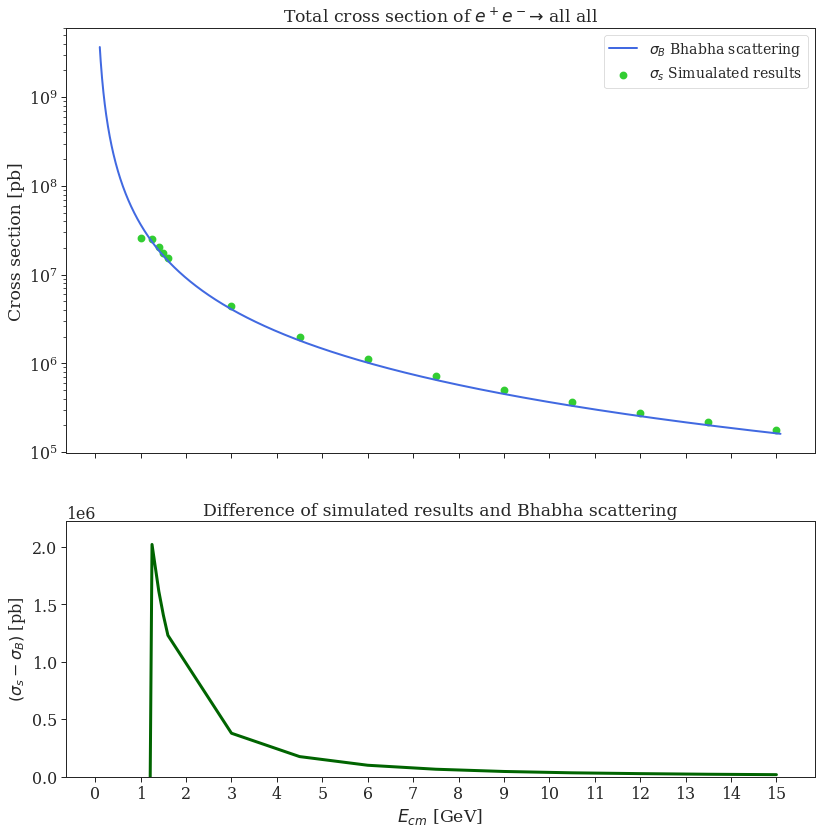

In [9]:


f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot total cross section
axarr[0].plot(energy,cross_sectionB, color = 'royalblue', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(e_cm,cross_section, color = 'limegreen',linewidth = 3, label = r'$\sigma_{s}$ Simualated results')
axarr[0].set_yscale('log')
axarr[0].set_ylabel('Cross section [pb]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to$ all all')



#Plot Difference between cross sections
axarr[1].plot(e_cm,diff, color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B})$ [pb]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
axarr[1].set_ylim((0,int(np.trunc(1.1*max(diff)))))
axarr[1].set_title('Difference of simulated results and Bhabha scattering')
axarr[1].set_xticks(range(0,16))
axarr[0].legend(fontsize=14)


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()

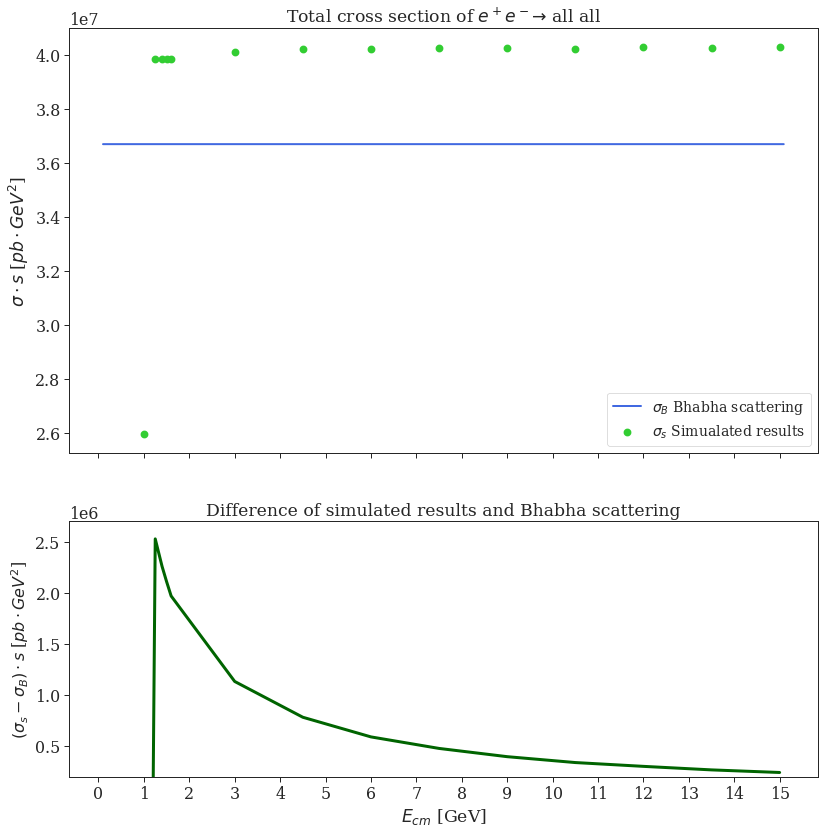

In [17]:

f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot total cross section
axarr[0].plot(energy,cs_ecmB, color = 'royalblue', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(e_cm,np.multiply(np.square(e_cm),cross_section), color = 'limegreen',linewidth = 3, label = r'$\sigma_{s}$ Simualated results')
#axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$\sigma \cdot s$ [$pb \cdot GeV^2$]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to$ all all')



#Plot Difference between cross sections
axarr[1].plot(e_cm,np.multiply(e_cm,diff), color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B}) \cdot s$ [$pb \cdot GeV^2$]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
axarr[1].set_ylim((2e5,2.7e6))
axarr[1].set_title('Difference of simulated results and Bhabha scattering')
axarr[1].set_xticks(range(0,16))
axarr[0].legend(fontsize=14)


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()

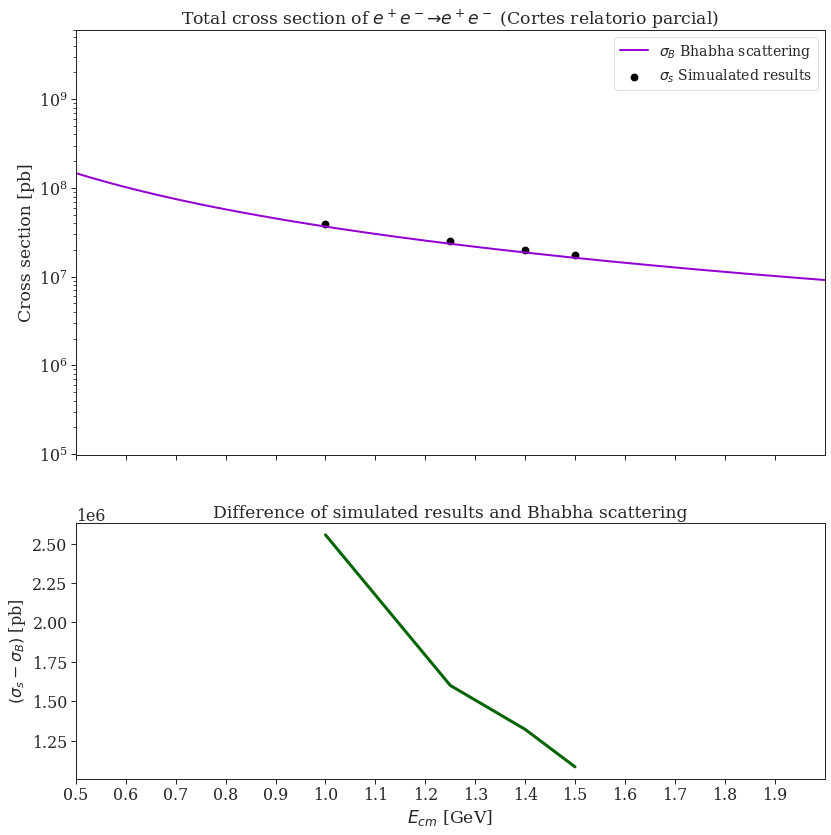

In [18]:

diff_epem2epem = []
cos_max = np.tanh(2.5)
integral = sc.integrate.quad(integrand,-1,cos_max)
for i,e in enumerate(e_cm[:4]):
    diff_epem2epem.append(-integral[0]/(e**2)+cross_section_epem[i])
    
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot total cross section
axarr[0].plot(energy,cross_sectionB, color = 'darkviolet', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(e_cm[:4],cross_section_epem, color = 'black',linewidth = 3, label = r'$\sigma_{s}$ Simualated results')
axarr[0].set_yscale('log')
axarr[0].set_ylabel('Cross section [pb]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to e^+e^-$ (Cortes relatorio parcial)')



#Plot Difference between cross sections
axarr[1].plot(e_cm[:4],diff_epem2epem, color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B})$ [pb]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
#axarr[1].set_ylim((0,int(np.trunc(1.1*max(diff)))))
axarr[1].set_title('Difference of simulated results and Bhabha scattering')
axarr[1].set_xlim((0.5,2))
axarr[1].set_xticks(np.arange(0.5,2,0.1))
axarr[0].legend(fontsize=14)


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()

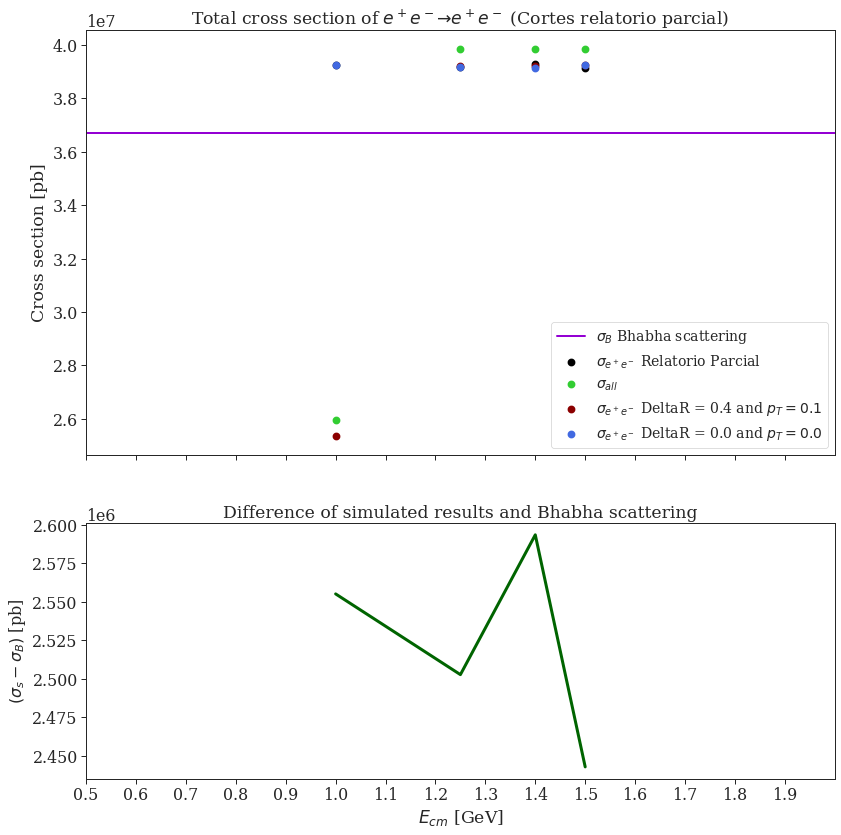

In [26]:

diff1_epem2epem = []
cos_max = np.tanh(2.5)
integral = sc.integrate.quad(integrand,-1,cos_max)
for i,e in enumerate(e_cm[:4]):
    diff1_epem2epem.append(-integral[0]+e**2 * cross_section_epem[i])
    
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[5, 3]}, figsize = [13,13])
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.92, top=0.92, wspace=None, hspace=0.2)


#Plot total cross section
axarr[0].plot(energy,np.multiply(np.square(energy),cross_sectionB), color = 'darkviolet', lw = 2, label = r'$\sigma_{B}$ Bhabha scattering')
axarr[0].scatter(e_cm[:4],np.multiply(np.square(e_cm[:4]),cross_section_epem), color = 'black',linewidth = 3, label = r'$\sigma_{e^+e^-}$ Relatorio Parcial')
axarr[0].scatter(e_cm[:4],np.multiply(np.square(e_cm[:4]),cross_section[:4]), color = 'limegreen',linewidth = 3, label = r'$\sigma_{all}$ ')
axarr[0].scatter(e_cm[:4],np.multiply(np.square(e_cm[:4]),cs_epem_CutTest), color = 'darkred',linewidth = 3, label = r'$\sigma_{e^+e^-}$ DeltaR = 0.4 and $p_T = 0.1$')
axarr[0].scatter(e_cm[:4],np.multiply(np.square(e_cm[:4]),cs_epem_noPtCut), color = 'royalblue',linewidth = 3, label = r'$\sigma_{e^+e^-}$ DeltaR = 0.0 and $p_T = 0.0$')
axarr[0].set_ylabel('Cross section [pb]')
axarr[0].set_title(r'Total cross section of $e^+e^-\to e^+e^-$ (Cortes relatorio parcial)')



#Plot Difference between cross sections
axarr[1].plot(e_cm[:4], diff1_epem2epem, color ='darkgreen', lw =3)
axarr[1].set_ylabel(r'$(\sigma_{s} - \sigma_{B})$ [pb]', fontsize = 16)
axarr[1].set_xlabel('$E_{cm}$ [GeV]')
#axarr[1].set_ylim((0,int(np.trunc(1.1*max(diff)))))
axarr[1].set_title('Difference of simulated results and Bhabha scattering')
axarr[1].set_xlim((0.5,2))
axarr[1].set_xticks(np.arange(0.5,2,0.1))
axarr[0].legend(fontsize=14, loc = 'lower right')


plt.savefig('CMSplusMad2.pdf', dpi = 300)
plt.show()